# Tokyo Olympics 2021 Data Analysis  

=========================================================================================================================

### Table of contents

1. Importing the libraries.

2. Loading the datasets

3. Data cleaning and preprocessing -> make a seperate section

4. Medals Analysis

5. Athletes Analysis

6. Teams Analysis

7. Gender Analysis

8. Coaches Analysis

=========================================================================================================================

## Import the required libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

=========================================================================================================================

## Loading the datasets 

In [3]:
medals = pd.read_excel('datasets/Medals.xlsx')
athletes = pd.read_excel('datasets/Athletes.xlsx')
teams = pd.read_excel('datasets/Teams.xlsx')
entries_gender = pd.read_excel('datasets/EntriesGender.xlsx')
coaches = pd.read_excel('datasets/Coaches.xlsx')

=========================================================================================================================

## Data cleaning and pre-processing 

=========================================================================================================================

## Medals Analysis

In [5]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [6]:
medals.dtypes

Rank              int64
Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

### 📍 Top 10 NOCs by total no. of medals  

In [7]:
medals = medals.sort_values(by = ['Rank by Total'])

top_10_by_medals = medals.head(10)
top_10_by_medals = top_10_by_medals.sort_values(by = ['Rank by Total'], ascending = False)
top_10_by_medals

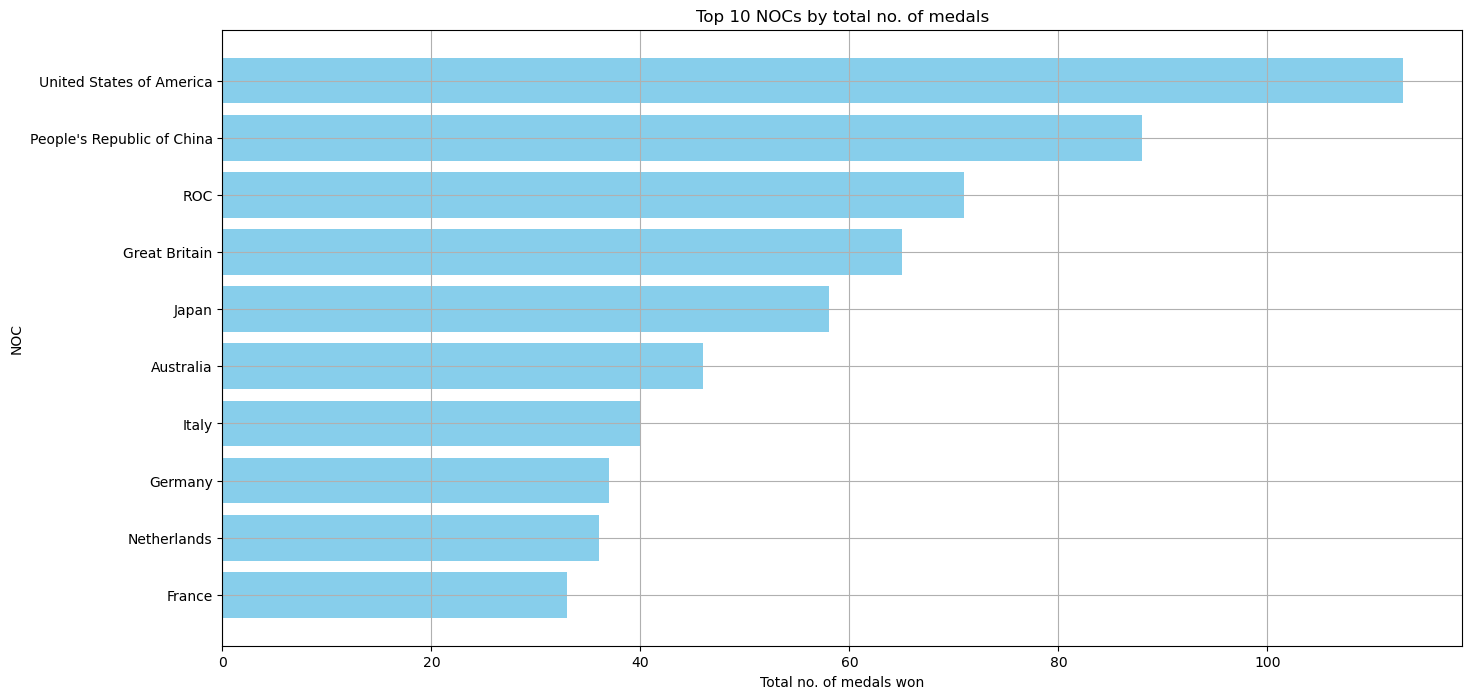

In [9]:
# plt.bar(top_10_by_medals['Rank by Total'], top_10_by_medals['Team/NOC'])
fig = plt.figure(figsize=(16, 8))
plt.barh(y = top_10_by_medals['Team/NOC'], width=top_10_by_medals['Total'], color='skyblue')
plt.title('Top 10 NOCs by total no. of medals')
plt.xlabel('Total no. of medals won')
plt.ylabel('NOC')
plt.grid()
plt.show()

### 📍 Top 10 countries medal distribution

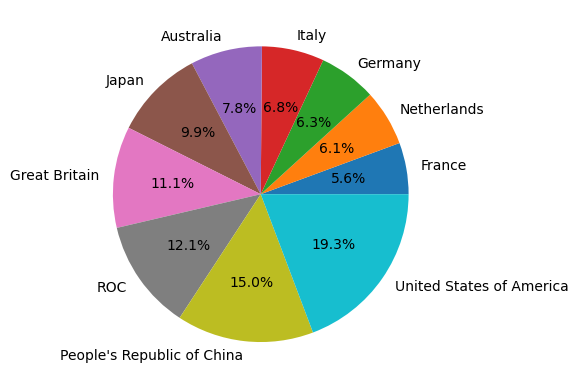

In [10]:
plt.pie(top_10_by_medals['Total'], labels = top_10_by_medals['Team/NOC'], autopct = '%1.1f%%')
plt.show()

=========================================================================================================================

## Athletes Analysis

In [11]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


### 📍 Top 20 NOCs by total no. of  athletes per NOC 

In [14]:
# counting the total no. of athletes per NOC
ath_per_noc = pd.pivot_table(athletes, values=['Name'], index=['NOC'], aggfunc={'Name':'count'})
# sorting (max to min)
ath_per_noc = ath_per_noc.sort_values(by = ['Name'], ascending = False)
ath_per_noc

,Name
NOC,
United States of America,615
Japan,586
Australia,470
People's Republic of China,401
Germany,400
...,...
South Sudan,2
Central African Republic,2
Saint Kitts and Nevis,2


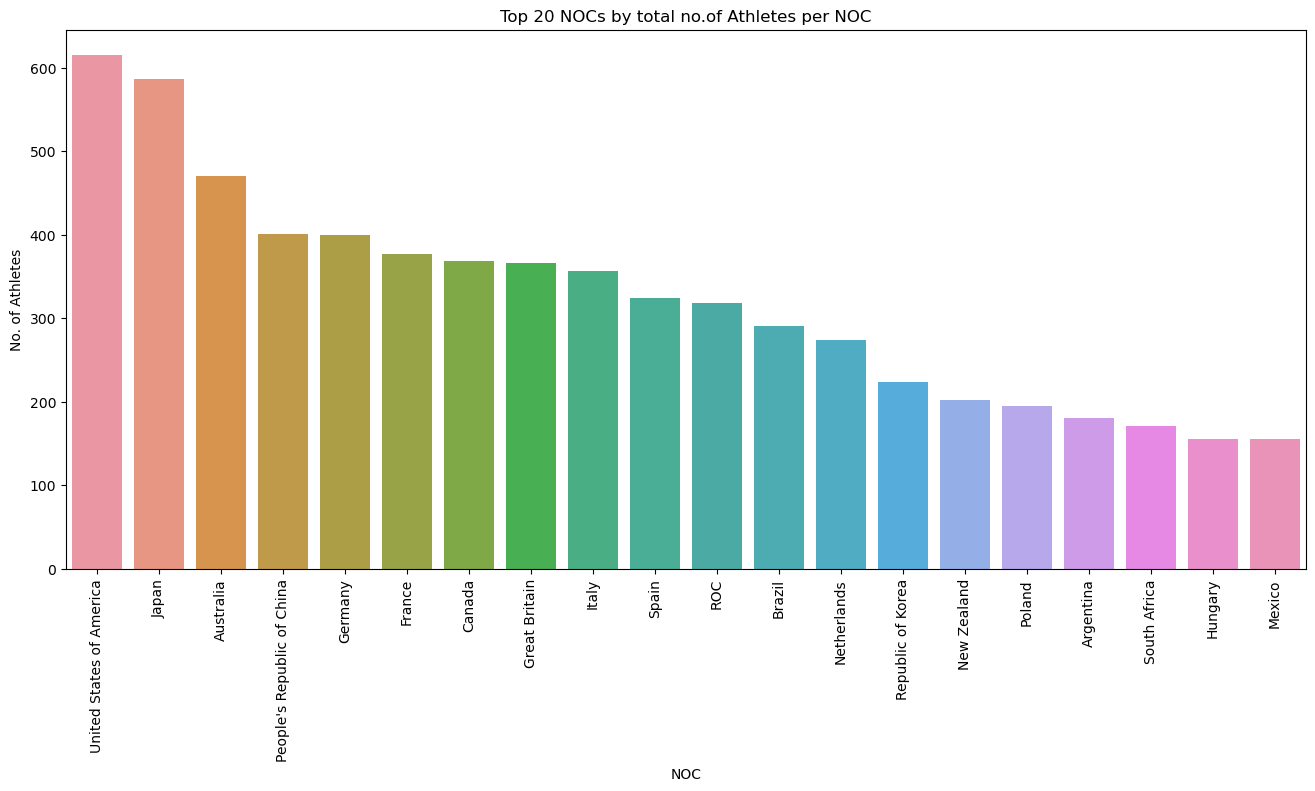

In [15]:
fig = plt.figure(figsize = (16, 7))
sns.barplot(x = ath_per_noc.head(20).index, y = 'Name', data = ath_per_noc.head(20))
plt.title('Top 20 NOCs by total no.of Athletes per NOC')
plt.xlabel('NOC')
plt.xticks(rotation='vertical')
plt.ylabel('No. of Athletes')

plt.show()

### 📍 Maximum no. of athletes are pariticipating in which discipline? 

In [16]:
athletes['Discipline'].unique()

array(['Cycling Road', 'Artistic Gymnastics', 'Rowing', 'Basketball',
       'Handball', 'Swimming', 'Karate', 'Wrestling',
       'Rhythmic Gymnastics', 'Baseball/Softball', 'Athletics',
       'Artistic Swimming', 'Judo', 'Shooting', 'Table Tennis',
       'Football', 'Taekwondo', 'Fencing', 'Badminton', 'Boxing',
       'Weightlifting', 'Archery', 'Diving', 'Beach Volleyball',
       'Sailing', 'Hockey', 'Trampoline Gymnastics', 'Marathon Swimming',
       'Triathlon', 'Canoe Slalom', 'Water Polo', 'Surfing',
       'Canoe Sprint', 'Cycling BMX Racing', 'Rugby Sevens', 'Volleyball',
       'Equestrian', 'Tennis', 'Cycling Track', 'Golf', 'Skateboarding',
       'Modern Pentathlon', 'Cycling Mountain Bike', '3x3 Basketball',
       'Cycling BMX Freestyle', 'Sport Climbing'], dtype=object)

In [17]:
ath_part = pd.pivot_table(athletes, values=['Name'], index=['Discipline'], aggfunc={'Name':'count'})
ath_part = ath_part.sort_values(by = ['Name'], ascending = False)
ath_part.head(15)

,Name
Discipline,
Athletics,2068
Swimming,743
Football,567
Rowing,496
Hockey,406
Judo,373
Handball,343
Shooting,342
Sailing,336


From the above table, we can see that Athletics had maximum number of participating athletes followed by Swimming, Football and so on.

=========================================================================================================================

## Teams Analysis

In [18]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [19]:
teams['Discipline'].unique()

array(['3x3 Basketball', 'Archery', 'Artistic Gymnastics',
       'Artistic Swimming', 'Athletics', 'Baseball/Softball',
       'Basketball', 'Beach Volleyball', 'Cycling Track', 'Fencing',
       'Football', 'Handball', 'Hockey', 'Rhythmic Gymnastics',
       'Rugby Sevens', 'Swimming', 'Table Tennis', 'Triathlon',
       'Volleyball', 'Water Polo'], dtype=object)

### 📍 Which NOCs had the most and least participation in terms of no. of disciplines? 

In [20]:
teams_min_max = pd.pivot_table(teams, values = ['Discipline'], index = ['NOC'], aggfunc = {'Discipline':'count'})
teams_min_max = teams_min_max.sort_values(by=['Discipline'], ascending = False)
teams_min_max.head()

,Discipline
NOC,
Japan,48
United States of America,47
Italy,37
Germany,36
Australia,35


In [21]:
rslt = teams_min_max.loc[teams_min_max['Discipline']==1]
rslt

,Discipline
NOC,
Slovakia,1
Uzbekistan,1
Venezuela,1
Vietnam,1
Singapore,1
Saudi Arabia,1
Angola,1
Republic of Moldova,1
Qatar,1


In [22]:
rslt.shape

(25, 1)

The NOC that participated in most number of disciplines is Japan. Also, there are 25 NOCs which participated in only one discipline as seen above.

=========================================================================================================================

## Gender Analysis 

In [23]:
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [26]:
entries_gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


### 📍 Athlete participation ratio (Male:Female) 

In [27]:
print('Total male athletes: ' + str(entries_gender['Male'].sum()))
print('Total female athletes: ' + str(entries_gender['Female'].sum()))
ath_ratio = entries_gender['Male'].sum()/entries_gender['Female'].sum()
print('(Male athletes:Female athletes) ratio = ' + str(ath_ratio))

Total male athletes: 5884
Total female athletes: 5432
(Male athletes:Female athletes) ratio = 1.0832106038291605


In [28]:
ath_rto = [entries_gender['Male'].sum(), entries_gender['Female'].sum()]

**Visualizing it.**

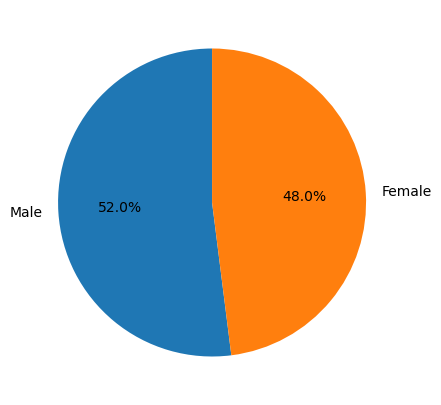

In [29]:
plt.figure(figsize=(16,5))
plt.pie(ath_rto, labels = ['Male', 'Female'], autopct = '%1.1f%%', startangle=90)
plt.show()

### 📍 No. of male and female athletes per discipline

In [30]:
gender_part = entries_gender.sort_values(by = ['Total'], ascending = False)
gender_part.head()

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393


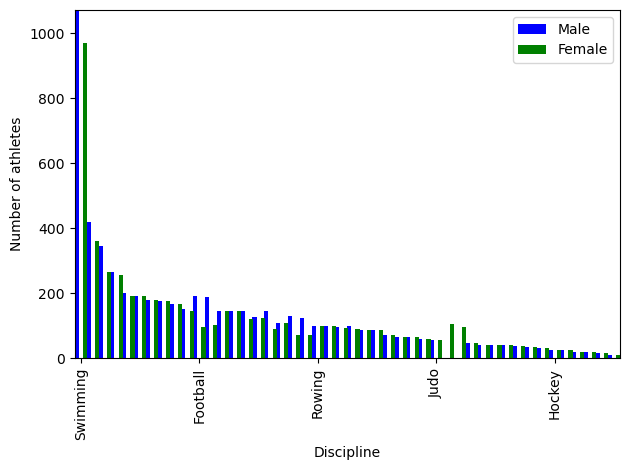

In [31]:
# plt.figure(figsize = (50, 12))

labels = gender_part['Discipline']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rect1 = ax.bar(x-width, gender_part['Male'], color='b', width = width, label='Male')
rect2 = ax.bar(x+width, gender_part['Female'], color='g', width = width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Discipline')
ax.set_ylabel('Number of athletes')
plt.xticks(rotation = 'vertical')
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rect1, padding=3)
#ax.bar_label(rect2, padding=3)

#fig.size(20, 8)
fig.tight_layout()

ax.autoscale(tight=True)

plt.show()

In [32]:
# check the above chart

=========================================================================================================================

## Coaches Analysis 

In [33]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [34]:
coaches = coaches.drop('Event', 1)

### 📍 Top 10 NOCs by no. of coaches 

In [45]:
coaches_pvt = coaches['NOC'].value_counts()
coaches_pvt = coch_by_contry.sort_values()
coaches_pvt

Egypt                         12
People's Republic of China    12
ROC                           12
South Africa                  12
Italy                         14
Canada                        16
Australia                     22
United States of America      28
Spain                         28
Japan                         35
Name: NOC, dtype: int64

**Visualizing it.**

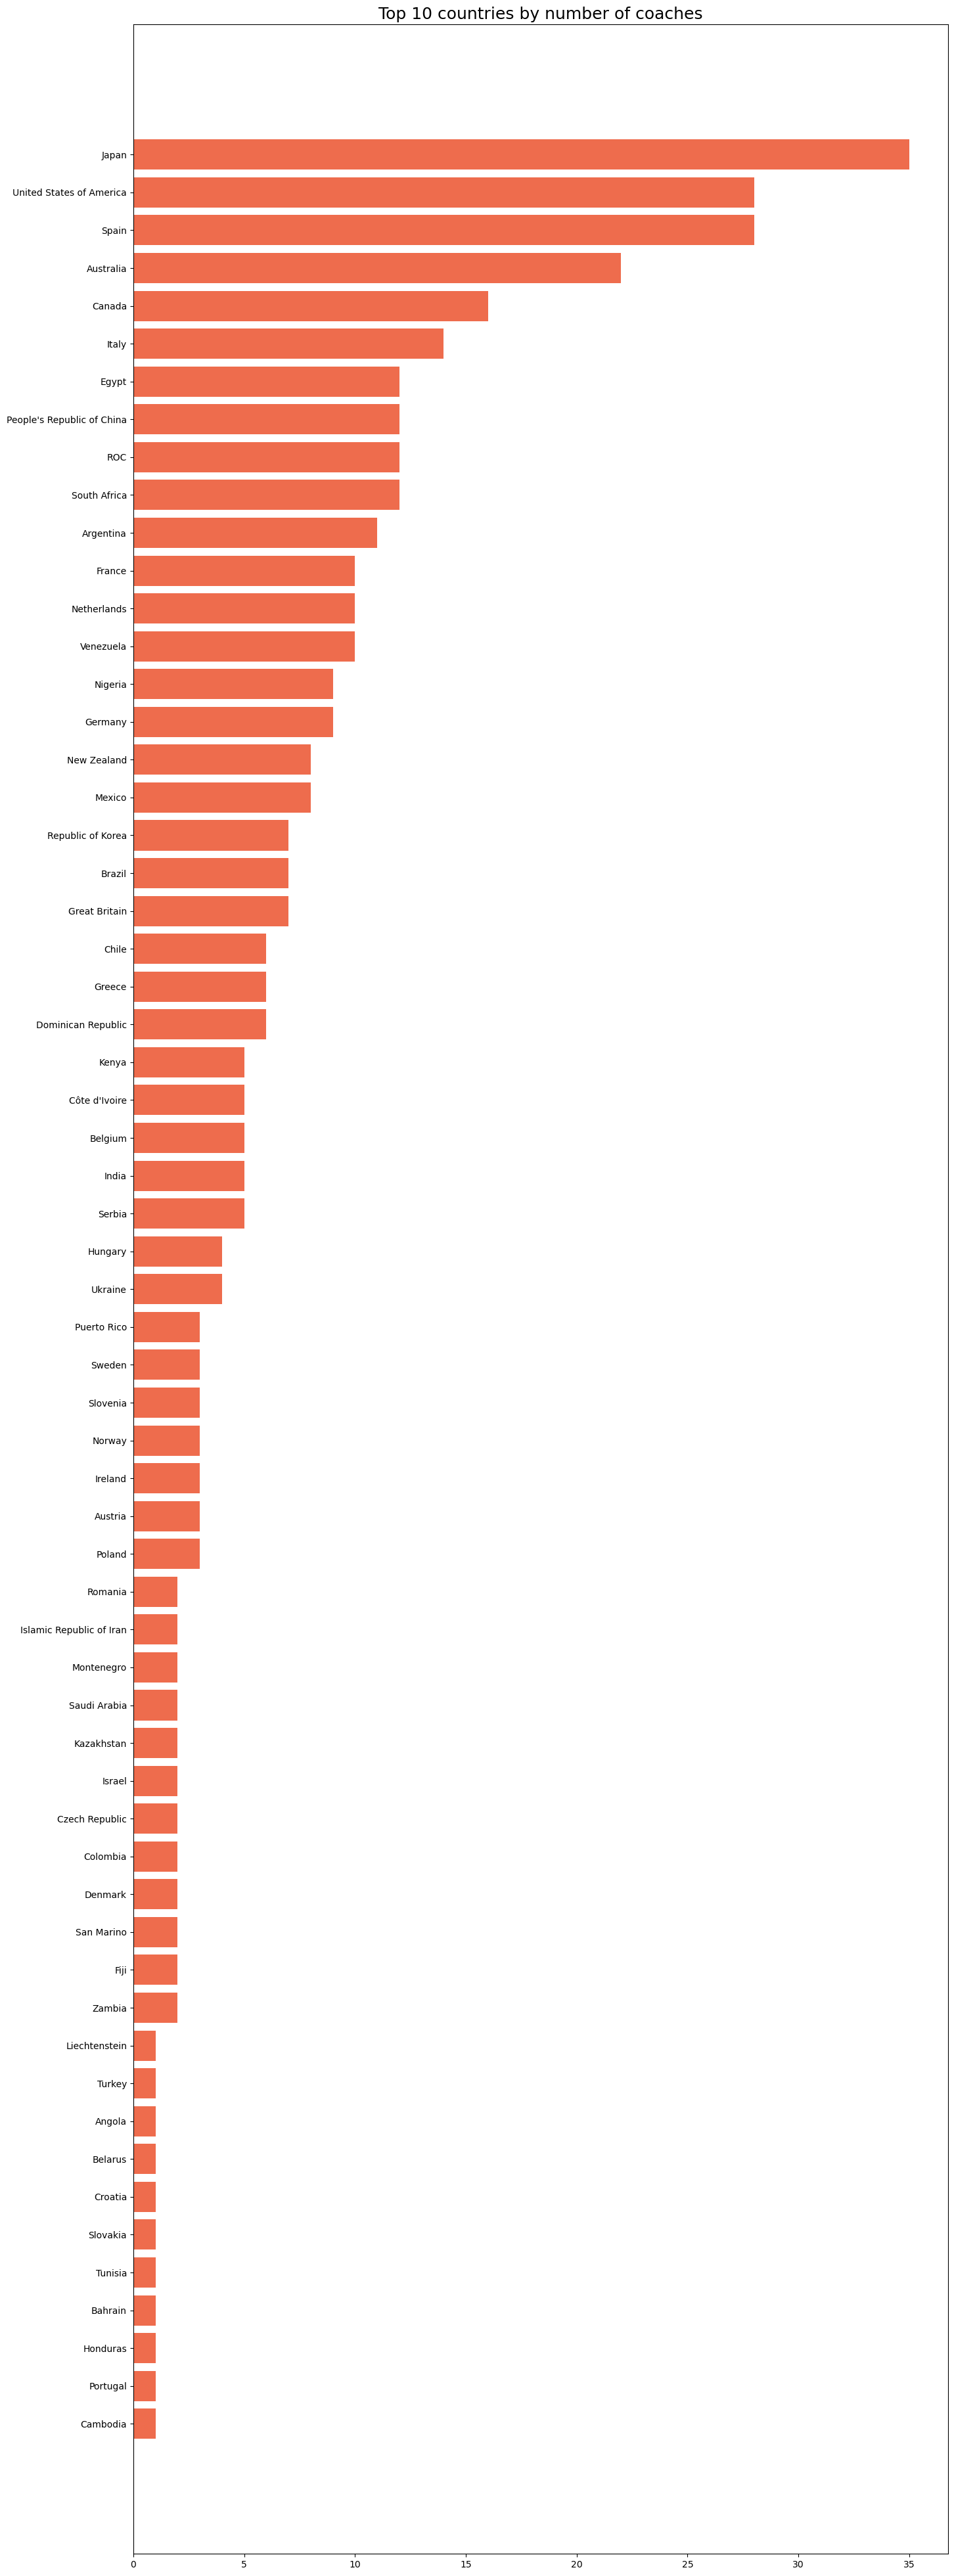

In [50]:
coch_by_contry=coaches['NOC'].value_counts()
coch_by_contry=coch_by_contry.sort_values()
fig,ax=plt.subplots(figsize=(16,50))

ax.barh(coch_by_contry.index,coch_by_contry.values,color='#ee6c4d')
ax.set_title("Top 10 countries by number of coaches",fontsize=18)
plt.show()

=========================================================================================================================